In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

### Data are from the following Jupyter notebooks:
DataFig8_Experiment1_TempNutDependence.ipynb\
DataFig8_Experiment2_TempNutDependence.ipynb\
DataFig8_Experiment3_TempNutDependence.ipynb\
DataFig8_Experiment4_TempNutDependence.ipynb\
DataFig8_Experiment5_TempNutDependence.ipynb\
DataFig8_Experiment6_TempNutDependence.ipynb\
DataFig8_Experiment7_TempNutDependence.ipynb\
DataFig8_Experiment8_TempNutDependence.ipynb\
DataFig8_Experiment9_TempNutDependence.ipynb\
DataFig8_Experiment10_TempNutDependence.ipynb

## Cold Year Temperature Dependence

In [2]:
CY_Orig_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.71801026,
       2.01759631, 1.6235645 , 1.62594145, 2.17141027, 2.86825685,
       2.86842105, 2.86842105]

In [3]:
CY_Nuts_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.7274651 ,
       2.0077527 , 1.6284581 , 1.62423619, 2.17564158, 2.86842105,
       2.86842105, 2.86842105]

In [4]:
CY_Thresh_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.86842105,
       2.64575917, 2.24499514, 2.24699953, 2.78350883, 2.86842105,
       2.86842105, 2.86842105]

In [5]:
CY_Winds_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.64321829,
       1.94331649, 1.36563426, 1.49478483, 2.04707723, 2.86842105,
       2.86842105, 2.86842105]

In [6]:
CY_Thermal_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.54163991,
       1.7570548 , 1.61017891, 1.57797733, 2.04603206, 2.86842105,
       2.86842105, 2.86842105]

In [7]:
CY_Rivers_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.71468701,
       2.03334444, 1.64448171, 1.62432392, 2.17722077, 2.86842105,
       2.86842105, 2.86842105]

## Cold Year Nutrient Dependence

In [8]:
CY_Orig_N=[2.7221158 , 2.708115  , 2.69803772, 2.41223631, 2.13320566,
       1.66596816, 1.77915256, 2.16807684, 2.48353042, 2.62498116,
       2.69787261, 2.7101102 ]

In [9]:
CY_Nuts_N=[2.71790914, 2.70250768, 2.68891046, 2.40196264, 2.12980189,
       1.59531493, 1.6377815 , 2.04411366, 2.51137107, 2.63857848,
       2.69545134, 2.70417954]

In [10]:
CY_Thresh_N=[2.72226185, 2.70910964, 2.69895643, 2.44240944, 2.12695889,
       1.51937422, 1.68264111, 1.95433637, 2.18702115, 2.60996958,
       2.69769548, 2.71094133]

In [11]:
CY_Winds_N=[2.71572291, 2.71303151, 2.67712113, 2.37496349, 2.06269187,
       1.6497327 , 1.46953269, 1.8048202 , 2.3686426 , 2.64092844,
       2.68102867, 2.70679687]

In [12]:
CY_Thermal_N=[2.72077093, 2.70944657, 2.68710666, 2.24705017, 2.16685761,
       1.55512552, 1.76019174, 1.94827353, 2.50659433, 2.6735886 ,
       2.70614202, 2.71361351]

In [13]:
CY_Rivers_N=[2.7218922 , 2.70928014, 2.69877294, 2.46835869, 2.12827134,
       1.61789777, 1.85068632, 2.18971926, 2.48187948, 2.61765264,
       2.69267453, 2.70909423]

## Cold Year Both

In [14]:
CY_Orig_B=[2.7221158 , 2.708115  , 2.69803772, 2.41223631, 2.0213472 ,
       1.17181235, 1.00702404, 1.22895696, 1.88004597, 2.6248309 ,
       2.69787261, 2.7101102 ]

In [15]:
CY_Nuts_B=[2.71790914, 2.70250768, 2.68891046, 2.40196264, 2.02514213,
       1.11664146, 0.92980022, 1.15747421, 1.90482611, 2.63857848,
       2.69545134, 2.70417954]

In [16]:
CY_Thresh_B=[2.72226185, 2.70910964, 2.69895643, 2.44240944, 2.12695889,
       1.40143242, 1.31693396, 1.53094432, 2.12228002, 2.60996958,
       2.69769548, 2.71094133]

In [17]:
CY_Winds_B=[2.71572291, 2.71303151, 2.67712113, 2.37496349, 1.90074776,
       1.1176716 , 0.69963375, 0.94052366, 1.69040536, 2.64092844,
       2.68102867, 2.70679687]

In [18]:
CY_Thermal_B=[2.72077093, 2.70944657, 2.68710666, 2.24705017, 1.92000117,
       0.95259403, 0.98807796, 1.07178528, 1.78794265, 2.6735886 ,
       2.70614202, 2.71361351]

In [19]:
CY_Rivers_B=[2.7218922 , 2.70928014, 2.69877294, 2.46835869, 2.01420589,
       1.14688303, 1.06100874, 1.23998998, 1.88382369, 2.61765264,
       2.69267453, 2.70909423]

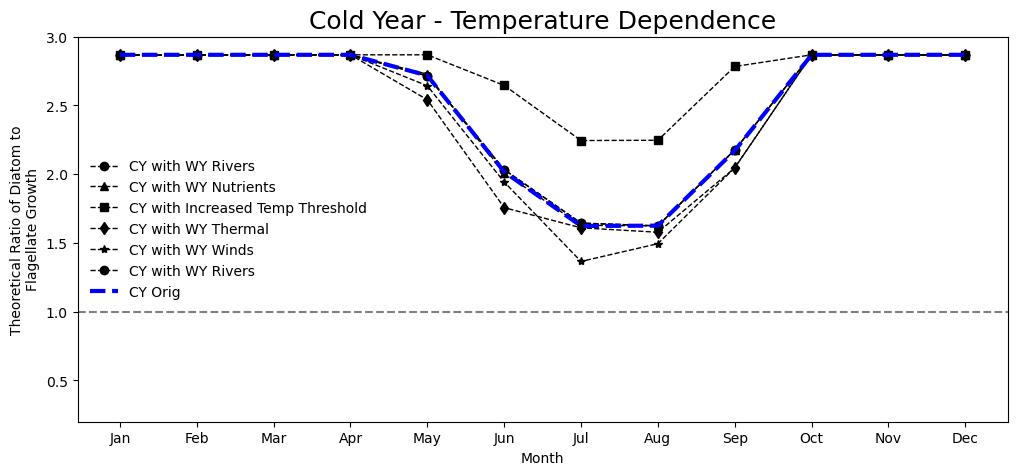

In [20]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]



ax.plot(xticks,CY_Rivers_T,'--',marker='o',linewidth=1,color='k',label='CY with WY Rivers')
ax.plot(xticks,CY_Nuts_T,'--',marker='^',linewidth=1,color='k',label='CY with WY Nutrients')
ax.plot(xticks,CY_Thresh_T,'--',marker='s',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax.plot(xticks,CY_Thermal_T,'--',marker='d',linewidth=1,color='k',label='CY with WY Thermal')
ax.plot(xticks,CY_Winds_T,'--',marker='*',linewidth=1,color='k',label='CY with WY Winds')
ax.plot(xticks,CY_Rivers_T,'--',marker='o',linewidth=1,color='k',label='CY with WY Rivers')
ax.plot(xticks,CY_Orig_T,'--',color='b',linewidth=3,label='CY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Cold Year - Temperature Dependence',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

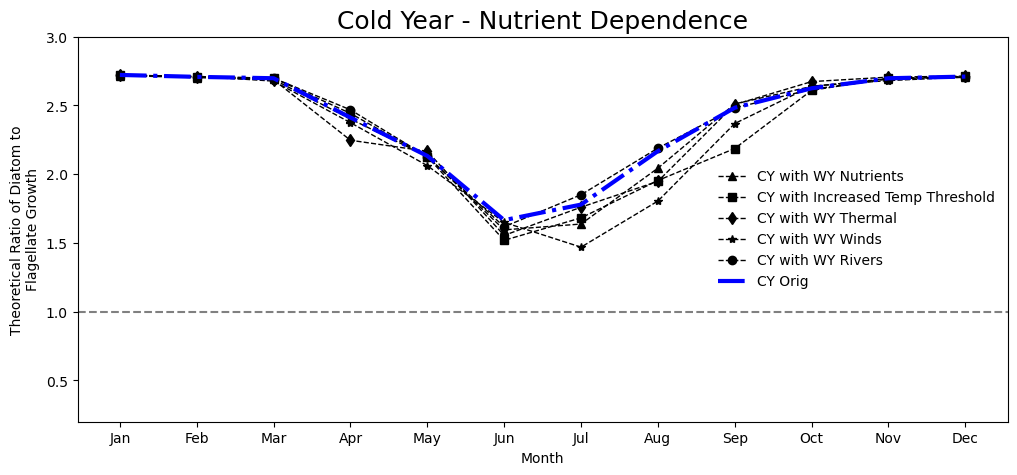

In [21]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]




ax.plot(xticks,CY_Nuts_N,'--',marker='^',linewidth=1,color='k',label='CY with WY Nutrients')
ax.plot(xticks,CY_Thresh_N,'--',marker='s',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax.plot(xticks,CY_Thermal_N,'--',marker='d',linewidth=1,color='k',label='CY with WY Thermal')
ax.plot(xticks,CY_Winds_N,'--',marker='*',linewidth=1,color='k',label='CY with WY Winds')
ax.plot(xticks,CY_Rivers_N,'--',marker='o',linewidth=1,color='k',label='CY with WY Rivers')
ax.plot(xticks,CY_Orig_N,'-.',color='b',linewidth=3,label='CY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Cold Year - Nutrient Dependence',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

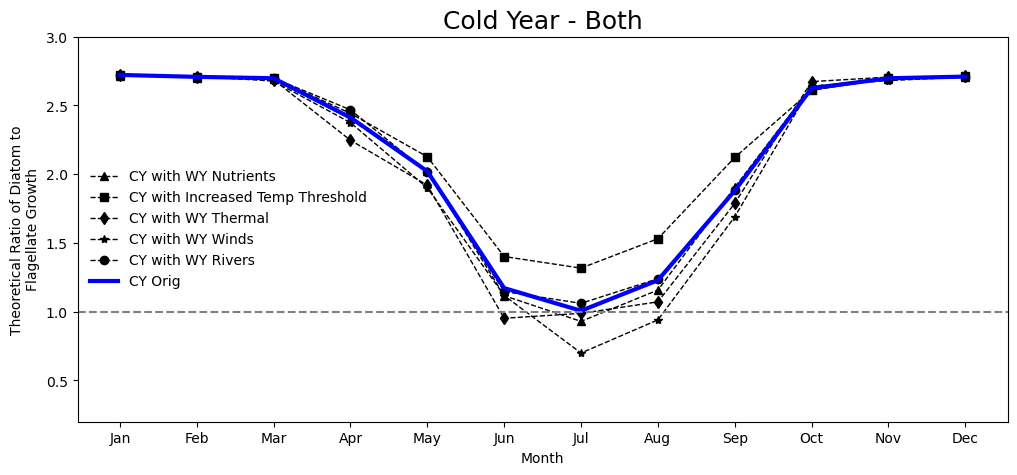

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]




ax.plot(xticks,CY_Nuts_B,'--',marker='^',linewidth=1,color='k',label='CY with WY Nutrients')
ax.plot(xticks,CY_Thresh_B,'--',marker='s',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax.plot(xticks,CY_Thermal_B,'--',marker='d',linewidth=1,color='k',label='CY with WY Thermal')
ax.plot(xticks,CY_Winds_B,'--',marker='*',linewidth=1,color='k',label='CY with WY Winds')
ax.plot(xticks,CY_Rivers_B,'--',marker='o',linewidth=1,color='k',label='CY with WY Rivers')
ax.plot(xticks,CY_Orig_B,'-',color='b',linewidth=3,label='CY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Cold Year - Both',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

## Warm Year Temperature Dependence

In [23]:
WY_Orig_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.45133527,
       1.69821143, 1.38141568, 1.44842769, 1.8992004 , 2.86842105,
       2.86842105, 2.86842105]

In [24]:
WY_Nuts_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.43920512,
       1.72189713, 1.37359899, 1.44407755, 1.88229223, 2.86842105,
       2.86842105, 2.86842105]

In [25]:
WY_Thresh_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.86842105,
       2.33059088, 2.14874167, 2.17337652, 2.52881557, 2.86842105,
       2.86842105, 2.86842105]

In [26]:
WY_Winds_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.52198388,
       1.73792928, 1.61267925, 1.5718178 , 2.00825825, 2.86842105,
       2.86842105, 2.86842105]

In [27]:
WY_Thermal_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.64446494,
       1.92909246, 1.36809396, 1.49889916, 2.07185707, 2.84837706,
       2.86842105, 2.86842105]

In [28]:
WY_Rivers_T=[2.86842105, 2.86842105, 2.86842105, 2.86842105, 2.45404626,
       1.72678252, 1.37297695, 1.4480068 , 1.91139694, 2.86842105,
       2.86842105, 2.86842105]

## Warm Year Nutrient Dependence

In [29]:
WY_Orig_N=[2.7126459 , 2.70724865, 2.63142545, 2.22242729, 2.05778208,
       1.4703158 , 1.4229895 , 1.48950696, 2.38215846, 2.65003116,
       2.66552833, 2.69291243]

In [30]:
WY_Nuts_N=[2.71727345, 2.71311531, 2.64164468, 2.25438784, 2.07111979,
       1.51737876, 1.38228074, 1.56798219, 2.36533578, 2.65740654,
       2.67408585, 2.70278797]

In [31]:
WY_Thresh_N=[2.71286572, 2.70688654, 2.63375055, 2.20795307, 1.98546482,
       1.21375624, 1.00224684, 1.42106794, 2.2511846 , 2.62020713,
       2.6608295 , 2.69037836]

In [32]:
WY_Winds_N=[2.71603946, 2.70712962, 2.66984273, 2.13894932, 2.0946076 ,
       1.39087506, 1.70046397, 1.88280444, 2.49536915, 2.66640822,
       2.69583131, 2.70158617]

In [33]:
WY_Thermal_N=[2.71277626, 2.70691177, 2.66506309, 2.23651721, 2.05746729,
       1.61199503, 1.3814027 , 1.72196999, 2.42973229, 2.63896021,
       2.66972934, 2.69440864]

In [34]:
WY_Rivers_N=[2.71312929, 2.70705032, 2.63109434, 2.25416726, 2.06368532,
       1.61223576, 1.44798715, 1.44531944, 2.39809586, 2.65546763,
       2.67459232, 2.69711616]

## Warm Year Both

In [35]:
WY_Orig_B=[2.7126459 , 2.70724865, 2.63142545, 2.22242729, 1.75856811,
       0.87048137, 0.68530386, 0.75213613, 1.57724274, 2.65003116,
       2.66552833, 2.69291243]

In [36]:
WY_Nuts_B=[2.71727345, 2.71311531, 2.64164468, 2.25438784, 1.76120797,
       0.91087399, 0.66193191, 0.78938476, 1.55216165, 2.65740654,
       2.67408585, 2.70278797]

In [37]:
WY_Thresh_B=[2.71286572, 2.70688654, 2.63375055, 2.20795307, 1.98546482,
       0.98617643, 0.75078571, 1.07673024, 1.98465657, 2.62020713,
       2.6608295 , 2.69037836]

In [38]:
WY_Winds_B=[2.71603946, 2.70712962, 2.66984273, 2.13894932, 1.84162872,
       0.8427084 , 0.95603222, 1.03172633, 1.74707465, 2.66640822,
       2.69583131, 2.70158617]

In [39]:
WY_Thermal_B=[2.71277626, 2.70691177, 2.66506309, 2.23651721, 1.89682756,
       1.08411122, 0.65886028, 0.89981886, 1.7549927 , 2.62051965,
       2.66972934, 2.69440864]

In [40]:
WY_Rivers_B=[2.71312929, 2.70705032, 2.63109434, 2.25416726, 1.76556341,
       0.97056202, 0.69308269, 0.72961129, 1.59799172, 2.65546763,
       2.67459232, 2.69711616]

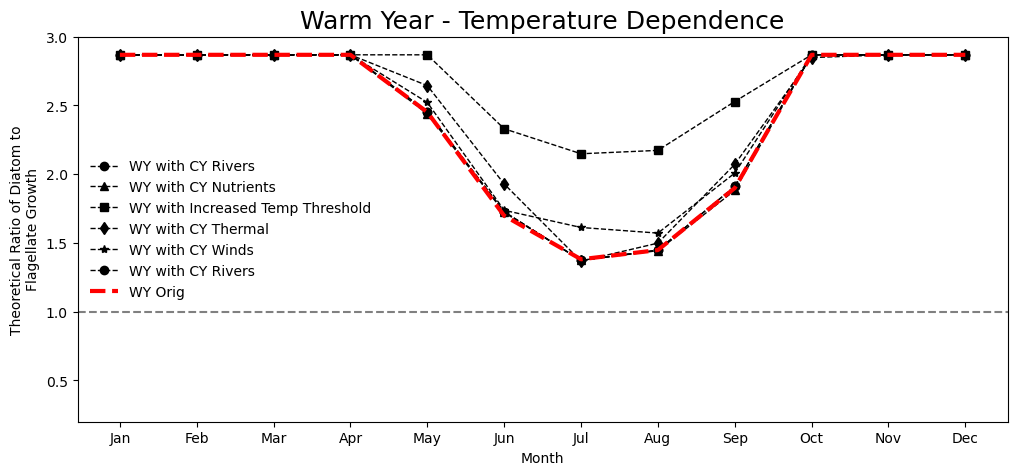

In [41]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]



ax.plot(xticks,WY_Rivers_T,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax.plot(xticks,WY_Nuts_T,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax.plot(xticks,WY_Thresh_T,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax.plot(xticks,WY_Thermal_T,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax.plot(xticks,WY_Winds_T,'--',marker='*',linewidth=1,color='k',label='WY with CY Winds')
ax.plot(xticks,WY_Rivers_T,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax.plot(xticks,WY_Orig_T,'--',color='r',linewidth=3,label='WY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Warm Year - Temperature Dependence',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

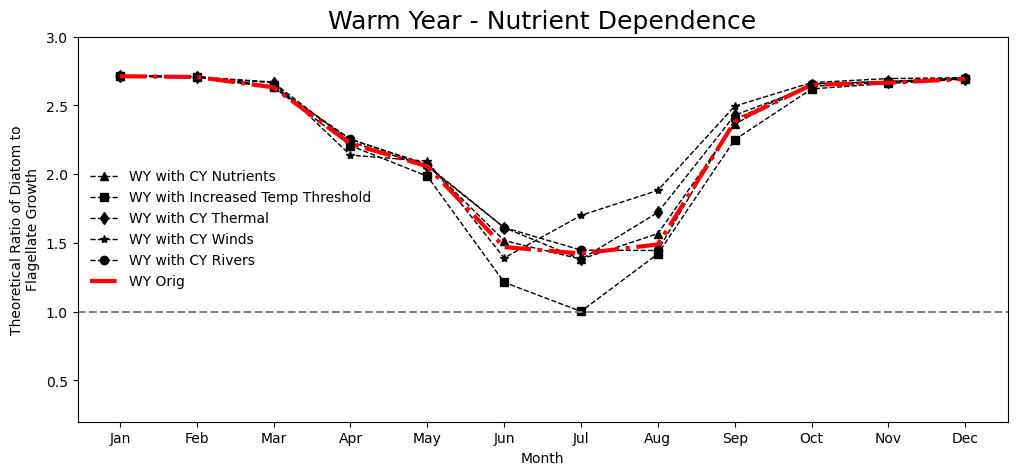

In [42]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]




ax.plot(xticks,WY_Nuts_N,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax.plot(xticks,WY_Thresh_N,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax.plot(xticks,WY_Thermal_N,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax.plot(xticks,WY_Winds_N,'--',marker='*',linewidth=1,color='k',label='WY with CY Winds')
ax.plot(xticks,WY_Rivers_N,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax.plot(xticks,WY_Orig_N,'-.',color='r',linewidth=3,label='WY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Warm Year - Nutrient Dependence',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

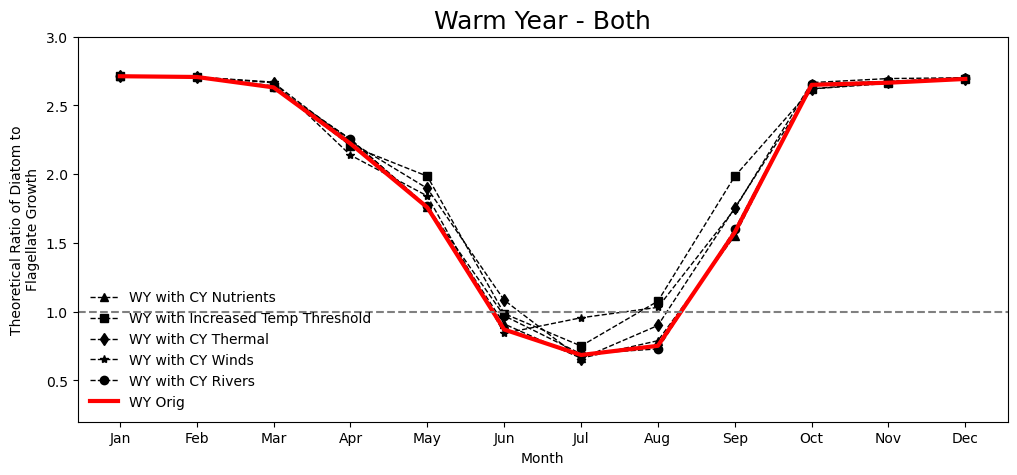

In [43]:
fig,ax=plt.subplots(1,1,figsize=(12,5))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]




ax.plot(xticks,WY_Nuts_B,'--',marker='^',linewidth=1,color='k',label='WY with CY Nutrients')
ax.plot(xticks,WY_Thresh_B,'--',marker='s',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax.plot(xticks,WY_Thermal_B,'--',marker='d',linewidth=1,color='k',label='WY with CY Thermal')
ax.plot(xticks,WY_Winds_B,'--',marker='*',linewidth=1,color='k',label='WY with CY Winds')
ax.plot(xticks,WY_Rivers_B,'--',marker='o',linewidth=1,color='k',label='WY with CY Rivers')
ax.plot(xticks,WY_Orig_B,'-',color='r',linewidth=3,label='WY Orig')

ax.legend(frameon=False)
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')
ax.set_ylim(0.2,3.0)
ax.set_title('Warm Year - Both',fontsize=18)
ax.axhline(y=1.0,color='grey',linestyle='--')

#choose 2 colours; 1 for 2008 and 1 for 2019; use solid for the final "both" plots
# diff. mortality rates for diatoms/flagellates - how will this effect things?
# response of light function might shift things a small amount

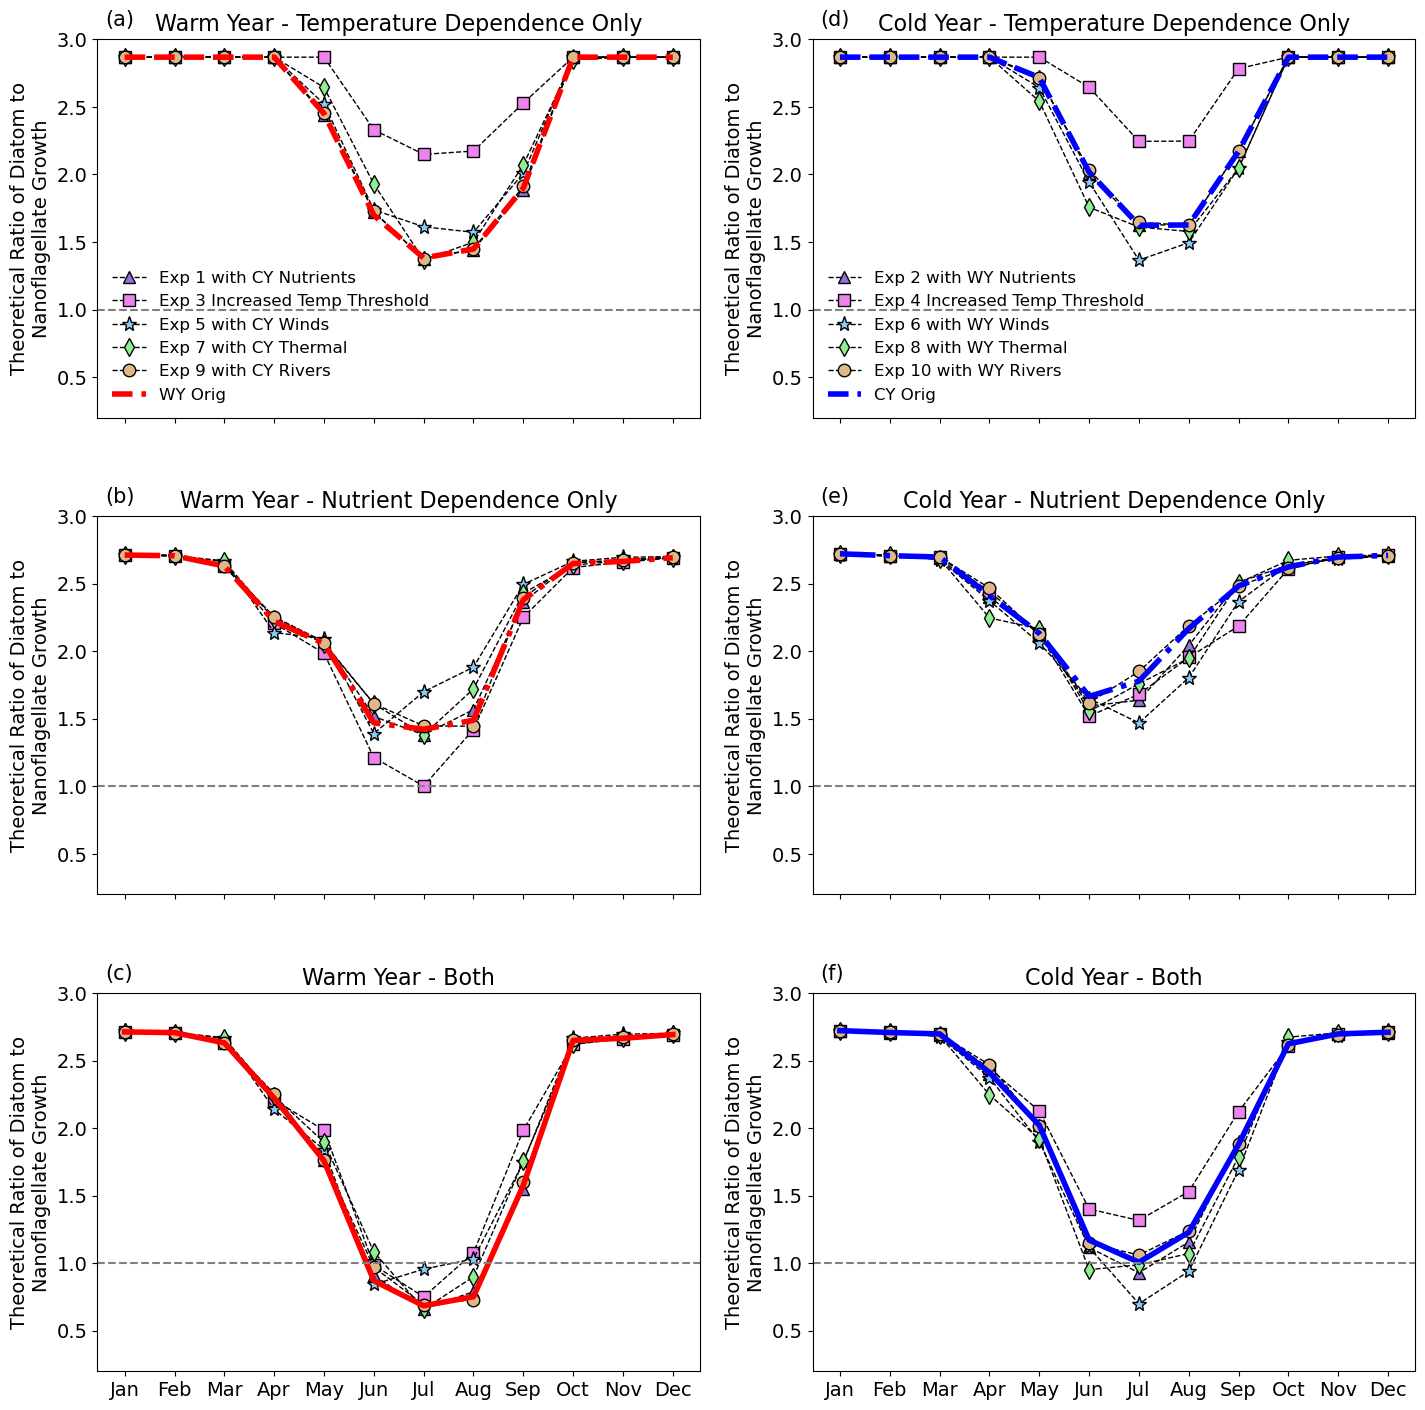

In [46]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
months=np.arange(1,13)
xticks=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"]

fig.tight_layout(pad=5)



ax[0,0].plot(xticks,WY_Nuts_T,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='Exp 1 with CY Nutrients')
ax[0,0].plot(xticks,WY_Thresh_T,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='Exp 3 Increased Temp Threshold')
ax[0,0].plot(xticks,WY_Winds_T,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='Exp 5 with CY Winds')
ax[0,0].plot(xticks,WY_Thermal_T,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='Exp 7 with CY Thermal')
ax[0,0].plot(xticks,WY_Rivers_T,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='Exp 9 with CY Rivers')
ax[0,0].plot(xticks,WY_Orig_T,'--',color='r',linewidth=4,label='WY Orig')
ax[0,0].legend(frameon=False,fontsize=12)
ax[0,0].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[0,0].set_xlabel('')
ax[0,0].set_ylim(0.2,3.0)
ax[0,0].set_title('Warm Year - Temperature Dependence Only',fontsize=16)
ax[0,0].axhline(y=1.0,color='grey',linestyle='--')
ax[0,0].xaxis.set_tick_params(labelsize=14)
ax[0,0].yaxis.set_tick_params(labelsize=14)
ax[0,0].set_xticklabels([])
ax[0,0].text(-.4, 3.1, '(a)', fontsize=15,  color='k')


ax[1,0].plot(xticks,WY_Nuts_N,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='Exp 2 with CY Nutrients')
ax[1,0].plot(xticks,WY_Thresh_N,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='Exp 4 with Increased Temp Threshold')
ax[1,0].plot(xticks,WY_Winds_N,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds')
ax[1,0].plot(xticks,WY_Thermal_N,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='Exp with CY Thermal')
ax[1,0].plot(xticks,WY_Rivers_N,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='WY with CY Rivers')
ax[1,0].plot(xticks,WY_Orig_N,'-.',color='r',linewidth=4,label='WY Orig')
ax[1,0].legend((),frameon=False)
ax[1,0].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[1,0].set_xlabel('')
ax[1,0].set_ylim(0.2,3.0)
ax[1,0].set_title('Warm Year - Nutrient Dependence Only',fontsize=16)
ax[1,0].axhline(y=1.0,color='grey',linestyle='--')
ax[1,0].xaxis.set_tick_params(labelsize=14)
ax[1,0].yaxis.set_tick_params(labelsize=14)
ax[1,0].set_xticklabels([])
ax[1,0].text(-.4, 3.1, '(b)', fontsize=15,  color='k')


ax[2,0].plot(xticks,WY_Nuts_B,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='WY with CY Nutrients')
ax[2,0].plot(xticks,WY_Thresh_B,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='WY with Increased Temp Threshold')
ax[2,0].plot(xticks,WY_Winds_B,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='WY with CY Winds')
ax[2,0].plot(xticks,WY_Thermal_B,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='WY with CY Thermal')
ax[2,0].plot(xticks,WY_Rivers_B,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='WY with CY Rivers')
ax[2,0].plot(xticks,WY_Orig_B,'-',color='r',linewidth=4,label='WY Orig')
ax[2,0].legend((),frameon=False)
ax[2,0].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[2,0].set_xlabel('')
ax[2,0].set_ylim(0.2,3.0)
ax[2,0].set_title('Warm Year - Both',fontsize=16)
ax[2,0].axhline(y=1.0,color='grey',linestyle='--')
ax[2,0].xaxis.set_tick_params(labelsize=14)
ax[2,0].yaxis.set_tick_params(labelsize=14)
#ax[2].set_xticklabels([])
ax[2,0].text(-.4, 3.1, '(c)', fontsize=15,  color='k')

ax[0,1].plot(xticks,CY_Nuts_T,'--',marker='^',markerfacecolor='mediumpurple',markersize=9,linewidth=1,color='k',label='Exp 2 with WY Nutrients')
ax[0,1].plot(xticks,CY_Thresh_T,'--',marker='s',markerfacecolor='violet',markersize=9,linewidth=1,color='k',label='Exp 4 Increased Temp Threshold')
ax[0,1].plot(xticks,CY_Winds_T,'--',marker='*',markerfacecolor='lightskyblue',markersize=11,linewidth=1,color='k',label='Exp 6 with WY Winds')
ax[0,1].plot(xticks,CY_Thermal_T,'--',marker='d',markerfacecolor='lightgreen',markersize=9,linewidth=1,color='k',label='Exp 8 with WY Thermal')
ax[0,1].plot(xticks,CY_Rivers_T,'--',marker='o',markerfacecolor='burlywood',markersize=9,linewidth=1,color='k',label='Exp 10 with WY Rivers')
ax[0,1].plot(xticks,CY_Orig_T,'--',color='b',linewidth=4,label='CY Orig')

ax[0,1].legend(frameon=False,fontsize=12)
ax[0,1].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[0,1].set_xlabel('')
ax[0,1].set_ylim(0.2,3.0)
ax[0,1].set_title('Cold Year - Temperature Dependence Only',fontsize=16)
ax[0,1].axhline(y=1.0,color='grey',linestyle='--')
ax[0,1].xaxis.set_tick_params(labelsize=14)
ax[0,1].yaxis.set_tick_params(labelsize=14)
ax[0,1].set_xticklabels([])
ax[0,1].text(-.4, 3.1, '(d)', fontsize=15,  color='k')



ax[1,1].plot(xticks,CY_Nuts_N,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[1,1].plot(xticks,CY_Thresh_N,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[1,1].plot(xticks,CY_Winds_N,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[1,1].plot(xticks,CY_Thermal_N,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[1,1].plot(xticks,CY_Rivers_N,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[1,1].plot(xticks,CY_Orig_N,'-.',color='b',markersize=9,linewidth=4,label='CY Orig')

ax[1,1].legend((),frameon=False)
ax[1,1].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[1,1].set_xlabel('')
ax[1,1].set_ylim(0.2,3.0)
ax[1,1].set_title('Cold Year - Nutrient Dependence Only',fontsize=16)
ax[1,1].axhline(y=1.0,color='grey',linestyle='--')
ax[1,1].xaxis.set_tick_params(labelsize=14)
ax[1,1].yaxis.set_tick_params(labelsize=14)
ax[1,1].set_xticklabels([])
ax[1,1].text(-.4, 3.1, '(e)', fontsize=15,  color='k')

ax[2,1].plot(xticks,CY_Nuts_B,'--',marker='^',markersize=9,markerfacecolor='mediumpurple',linewidth=1,color='k',label='CY with WY Nutrients')
ax[2,1].plot(xticks,CY_Thresh_B,'--',marker='s',markersize=9,markerfacecolor='violet',linewidth=1,color='k',label='CY with Increased Temp Threshold')
ax[2,1].plot(xticks,CY_Winds_B,'--',marker='*',markersize=11,markerfacecolor='lightskyblue',linewidth=1,color='k',label='CY with WY Winds')
ax[2,1].plot(xticks,CY_Thermal_B,'--',marker='d',markersize=9,markerfacecolor='lightgreen',linewidth=1,color='k',label='CY with WY Thermal')
ax[2,1].plot(xticks,CY_Rivers_B,'--',marker='o',markersize=9,markerfacecolor='burlywood',linewidth=1,color='k',label='CY with WY Rivers')
ax[2,1].plot(xticks,CY_Orig_B,'-',color='b',linewidth=4,label='CY Orig')

ax[2,1].legend((),frameon=False)
ax[2,1].set_ylabel('Theoretical Ratio of Diatom to\nNanoflagellate Growth',fontsize=14)
ax[2,1].set_xlabel('')
ax[2,1].set_ylim(0.2,3.0)
ax[2,1].set_title('Cold Year - Both',fontsize=16)
ax[2,1].axhline(y=1.0,color='grey',linestyle='--')
ax[2,1].xaxis.set_tick_params(labelsize=14)
ax[2,1].yaxis.set_tick_params(labelsize=14)
#ax[2].set_xticklabels([])
ax[2,1].text(-.4, 3.1, '(f)', fontsize=15,  color='k')



#plt.savefig('Figure8_GrowthRatioPlots.png', bbox_inches='tight',dpi=1000,transparent=False)